<a href="https://colab.research.google.com/github/Tee-py/colab-ml-notebooks/blob/main/AlgorithmicStockTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Using Dual Moving Average CrossOver to Generate a Buy or Sell Signal

In [3]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import pandas as pd

In [5]:
#Loading data
from google.colab import files
up_file = files.upload()

Saving AAPL (1).csv to AAPL (1).csv


In [6]:
AAPL = pd.read_csv("AAPL (1).csv")
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-11-09,11.466071,11.475000,11.232142,11.288571,9.659012,383544000
1,2010-11-10,11.308572,11.384643,11.198215,11.358214,9.718604,384227200
2,2010-11-11,11.250000,11.371428,11.223214,11.308928,9.676432,361284000
3,2010-11-12,11.285714,11.303572,10.843928,11.001071,9.413017,795846800
4,2010-11-15,11.016429,11.090714,10.938214,10.965714,9.382764,403606000
...,...,...,...,...,...,...,...
2512,2020-11-02,109.110001,110.680000,107.320000,108.769997,108.582664,122866900
2513,2020-11-03,109.660004,111.489998,108.730003,110.440002,110.249794,107624400
2514,2020-11-04,114.139999,115.589996,112.349998,114.949997,114.752022,138235500
2515,2020-11-05,117.949997,119.620003,116.870003,119.029999,118.824997,126387100


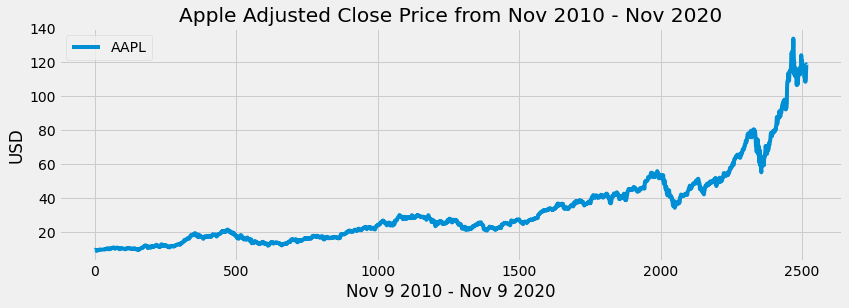

In [10]:
#visualize data
plt.figure(figsize=(12.5, 4))
plt.plot(AAPL["Adj Close"], label="AAPL")
plt.title("Apple Adjusted Close Price from Nov 2010 - Nov 2020")
plt.xlabel("Nov 9 2010 - Nov 9 2020")
plt.ylabel("USD")
plt.legend(loc="upper left")
plt.show()

In [12]:
#Simple Moving Average with 30 day window
SMA_30 = pd.DataFrame()
SMA_30["Adj Close"] = AAPL["Adj Close"].rolling(window=30).mean()
SMA_30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2512,114.940034
2513,114.894446
2514,115.154996
2515,115.514709


In [14]:
#Simple Moving Average for 100 days
SMA_100 = pd.DataFrame()
SMA_100["Adj Close"] = AAPL["Adj Close"].rolling(window=100).mean()
SMA_100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2512,107.823373
2513,108.081852
2514,108.374914
2515,108.686062


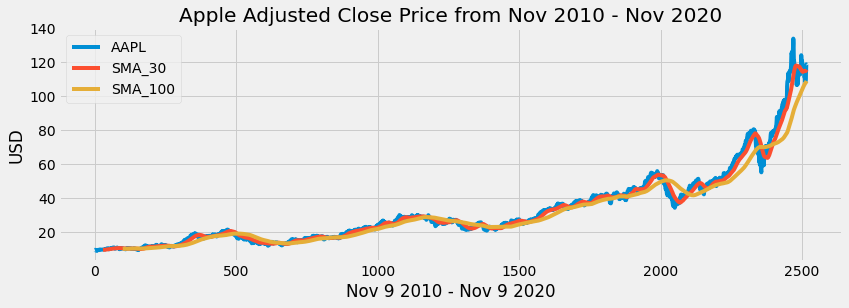

In [15]:
#visualize AAPL SMA_30 SMA_100
plt.figure(figsize=(12.5, 4))
plt.plot(AAPL["Adj Close"], label="AAPL")
plt.plot(SMA_30["Adj Close"], label="SMA_30")
plt.plot(SMA_100["Adj Close"], label="SMA_100")
plt.title("Apple Adjusted Close Price from Nov 2010 - Nov 2020")
plt.xlabel("Nov 9 2010 - Nov 9 2020")
plt.ylabel("USD")
plt.legend(loc="upper left")
plt.show()

In [16]:
#New dataframe to store all data
dataset = pd.DataFrame()
dataset["AAPL"] = AAPL["Adj Close"]
dataset["SMA_30"] = SMA_30["Adj Close"]
dataset["SMA_100"] = SMA_100["Adj Close"]
dataset

,AAPL,SMA_30,SMA_100
0,9.659012,NaN,NaN
1,9.718604,NaN,NaN
2,9.676432,NaN,NaN
3,9.413017,NaN,NaN
4,9.382764,NaN,NaN
...,...,...,...
2512,108.582664,114.940034,107.823373
2513,110.249794,114.894446,108.081852
2514,114.752022,115.154996,108.374914
2515,118.824997,115.514709,108.686062


In [29]:
#Create a signal function

def buy_sell(data):
  buy_prices = []
  sell_prices = []
  flag = -1
  for i in range(len(data)):
    if data["SMA_30"][i] > data["SMA_100"][i]:
      if flag != 1:
        buy_prices.append(data["AAPL"][i])
        sell_prices.append(np.nan)
        flag = 1
      else:
        buy_prices.append(np.nan)
        sell_prices.append(np.nan)
    elif data["SMA_30"][i] < data["SMA_100"][i]:
      if flag != 0:
        buy_prices.append(np.nan)
        sell_prices.append(data["AAPL"][i])
        flag = 0
      else:
        buy_prices.append(np.nan)
        sell_prices.append(np.nan)
    else:
      buy_prices.append(np.nan)
      sell_prices.append(np.nan)
  return (buy_prices, sell_prices)


In [30]:
buy_sell = buy_sell(dataset)
dataset["Buy Signal"] = buy_sell[0]
dataset["Sell Signal"] = buy_sell[1]

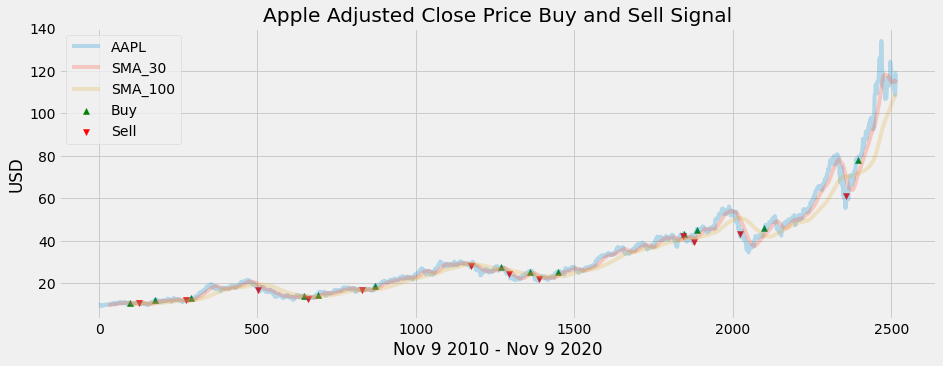

In [31]:
#Visualize data
plt.figure(figsize=(14, 5))
plt.plot(dataset['AAPL'], label="AAPL", alpha = 0.25)
plt.plot(dataset['SMA_30'], label="SMA_30", alpha = 0.25)
plt.plot(dataset['SMA_100'], label="SMA_100", alpha = 0.25)
plt.scatter(dataset.index, dataset["Buy Signal"], label = "Buy", marker="^", color = "green")
plt.scatter(dataset.index, dataset["Sell Signal"], label = "Sell", marker="v", color = "red")
plt.title("Apple Adjusted Close Price Buy and Sell Signal")
plt.xlabel("Nov 9 2010 - Nov 9 2020")
plt.ylabel("USD")
plt.legend(loc="upper left")
plt.show()